<a href="https://colab.research.google.com/github/DanielWarfield1/MLWritingAndResearch/blob/main/dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# underlying Problem

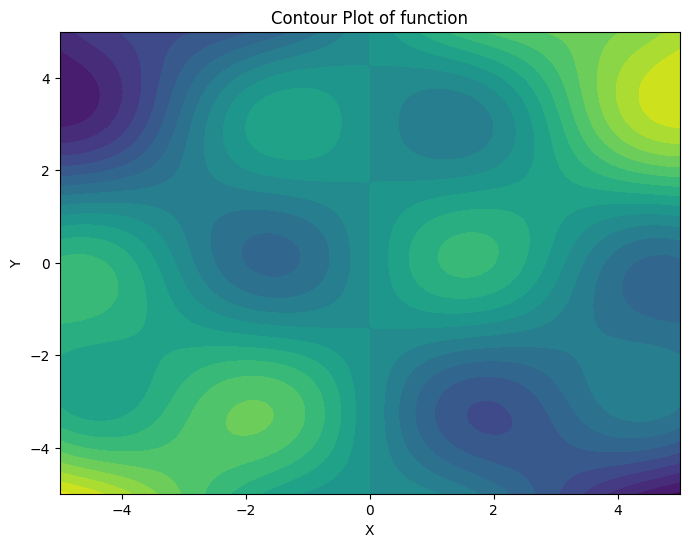

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Define a complex function
def complex_function(x, y):
    return np.sin(x) * np.cos(y) + 0.1 * x * y

# Create a grid for contour plot
X, Y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = complex_function(X, Y)

# Plot contour
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=20, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour Plot of function')
plt.show()


# Creating Dataset

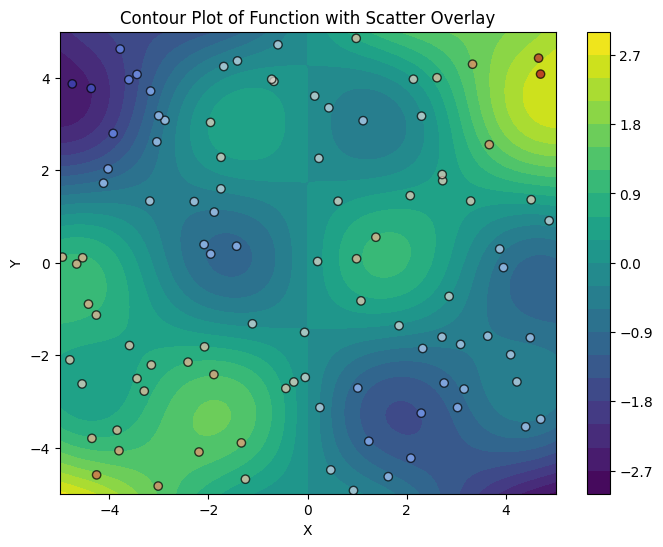

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Define a complex function
def complex_function(x, y):
    return np.sin(x) * np.cos(y) + 0.1 * x * y

# Generate dataset
N = 100  # Number of samples
x = np.random.uniform(-5, 5, N)
y = np.random.uniform(-5, 5, N)
z = complex_function(x, y)  # Compute function values

# Create a grid for contour plot
X, Y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = complex_function(X, Y)

# Plot contour
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(contour)  # Add color bar for reference

# Scatter plot with colors based on function values
plt.scatter(x, y, c=z, cmap='coolwarm', edgecolors='k', alpha=0.7)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour Plot of Function with Scatter Overlay')
plt.show()


# Training an AI Model

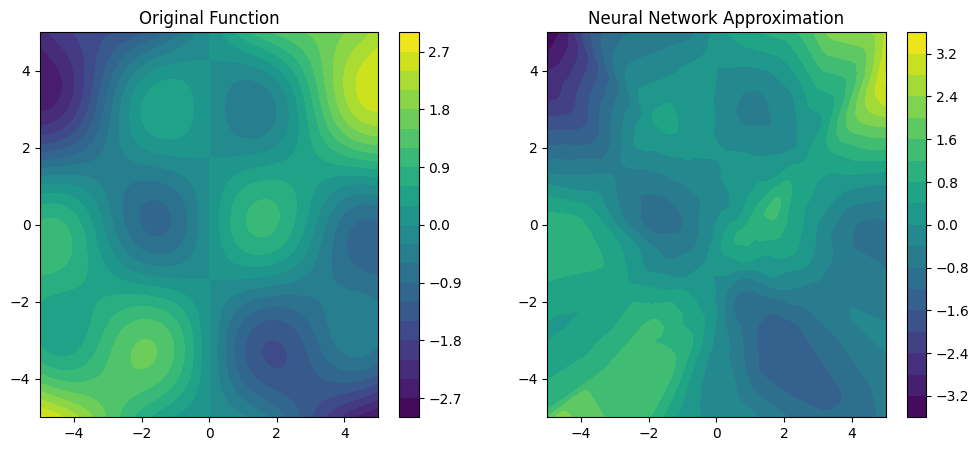

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Define the complex function
def complex_function(x, y):
    return np.sin(x) * np.cos(y) + 0.1 * x * y

# Generate dataset
N = 100  # Number of samples
x = np.random.uniform(-5, 5, N)
y = np.random.uniform(-5, 5, N)
z = complex_function(x, y)

X_train = torch.tensor(np.column_stack((x, y)), dtype=torch.float32)
y_train = torch.tensor(z, dtype=torch.float32).unsqueeze(1)

# Define a neural network model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(2, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize model, loss function, and optimizer
model = NeuralNetwork()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Train the model
n_epochs = 5000
for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

# Generate high-resolution grid for visualization
grid_size = 100
grid_x, grid_y = np.meshgrid(np.linspace(-5, 5, grid_size), np.linspace(-5, 5, grid_size))
grid_points = torch.tensor(np.column_stack((grid_x.ravel(), grid_y.ravel())), dtype=torch.float32)

# Compute true function values
true_values = complex_function(grid_x, grid_y)

# Compute model predictions
model.eval()
with torch.no_grad():
    predicted_values = model(grid_points).numpy().reshape(grid_x.shape)

# Plot side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original function contour plot
contour1 = axes[0].contourf(grid_x, grid_y, true_values, levels=20, cmap='viridis')
fig.colorbar(contour1, ax=axes[0])
axes[0].set_title("Original Function")

# Neural network learned function contour plot
contour2 = axes[1].contourf(grid_x, grid_y, predicted_values, levels=20, cmap='viridis')
fig.colorbar(contour2, ax=axes[1])
axes[1].set_title("Neural Network Approximation")

plt.show()

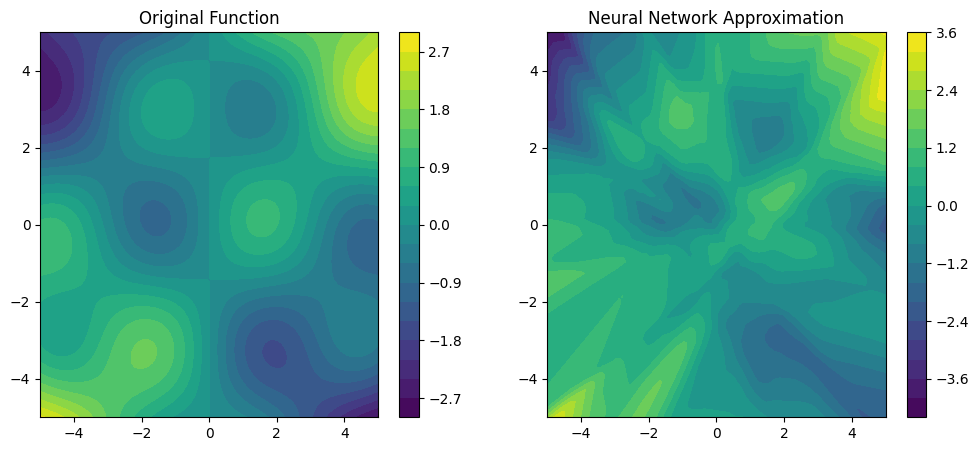

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Define the complex function
def complex_function(x, y):
    return np.sin(x) * np.cos(y) + 0.1 * x * y

# Generate dataset
N = 100  # Number of samples
x = np.random.uniform(-5, 5, N)
y = np.random.uniform(-5, 5, N)
z = complex_function(x, y)

#adding noise
z = z + np.random.normal(0, 0.3, N)

X_train = torch.tensor(np.column_stack((x, y)), dtype=torch.float32)
y_train = torch.tensor(z, dtype=torch.float32).unsqueeze(1)

# Define a neural network model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(2, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize model, loss function, and optimizer
model = NeuralNetwork()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Train the model
n_epochs = 5000
for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

# Generate high-resolution grid for visualization
grid_size = 100
grid_x, grid_y = np.meshgrid(np.linspace(-5, 5, grid_size), np.linspace(-5, 5, grid_size))
grid_points = torch.tensor(np.column_stack((grid_x.ravel(), grid_y.ravel())), dtype=torch.float32)

# Compute true function values
true_values = complex_function(grid_x, grid_y)

# Compute model predictions
model.eval()
with torch.no_grad():
    predicted_values = model(grid_points).numpy().reshape(grid_x.shape)

# Plot side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original function contour plot
contour1 = axes[0].contourf(grid_x, grid_y, true_values, levels=20, cmap='viridis')
fig.colorbar(contour1, ax=axes[0])
axes[0].set_title("Original Function")

# Neural network learned function contour plot
contour2 = axes[1].contourf(grid_x, grid_y, predicted_values, levels=20, cmap='viridis')
fig.colorbar(contour2, ax=axes[1])
axes[1].set_title("Neural Network Approximation")

plt.show()

Training model with dropout rate: 0.0
Training model with dropout rate: 0.2
Training model with dropout rate: 0.4
Training model with dropout rate: 0.6


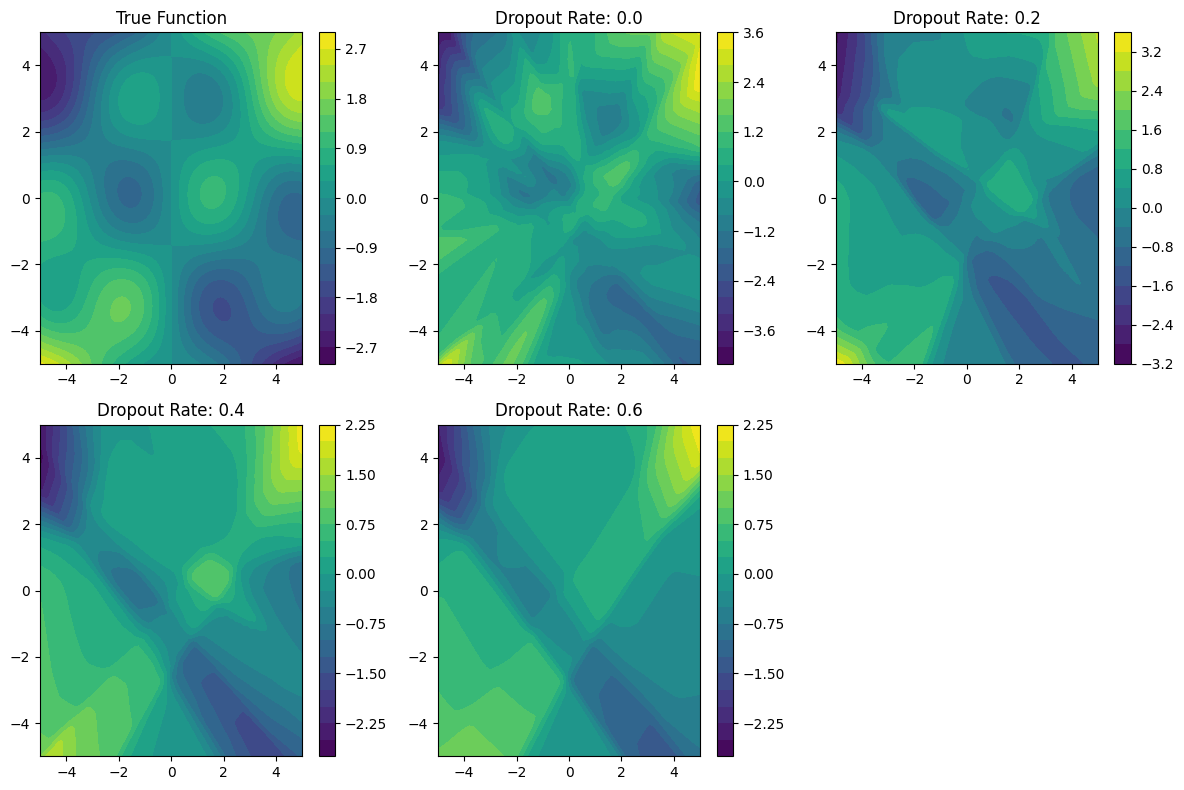

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Define the complex function
def complex_function(x, y):
    return np.sin(x) * np.cos(y) + 0.1 * x * y

# Generate dataset
N = 100  # Number of samples
x = np.random.uniform(-5, 5, N)
y = np.random.uniform(-5, 5, N)
z = complex_function(x, y)

# Adding noise
z = z + np.random.normal(0, 0.3, N)

X_train = torch.tensor(np.column_stack((x, y)), dtype=torch.float32)
y_train = torch.tensor(z, dtype=torch.float32).unsqueeze(1)

# Define a neural network model with dropout
class NeuralNetwork(nn.Module):
    def __init__(self, dropout_rate):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(2, 64)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(64, 64)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Train multiple models with different dropout rates
dropout_rates = [0.0, 0.2, 0.4, 0.6]
n_epochs = 5000
models = {}

for rate in dropout_rates:
    print(f"Training model with dropout rate: {rate}")
    model = NeuralNetwork(rate)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.MSELoss()

    for epoch in range(n_epochs):
        model.train()
        optimizer.zero_grad()
        output = model(X_train)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()

    models[rate] = model

# Generate high-resolution grid for visualization
grid_size = 100
grid_x, grid_y = np.meshgrid(np.linspace(-5, 5, grid_size), np.linspace(-5, 5, grid_size))
grid_points = torch.tensor(np.column_stack((grid_x.ravel(), grid_y.ravel())), dtype=torch.float32)

# Compute true function values
true_values = complex_function(grid_x, grid_y)

# Plot the true function
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
contour1 = plt.contourf(grid_x, grid_y, true_values, levels=20, cmap='viridis')
plt.colorbar()
plt.title('True Function')

# Visualizing model predictions for each dropout rate
for i, rate in enumerate(dropout_rates):
    models[rate].eval()
    with torch.no_grad():
        predictions = models[rate](grid_points).numpy().reshape(grid_x.shape)

    plt.subplot(2, 3, i+2)
    contour2 = plt.contourf(grid_x, grid_y, predictions, levels=20, cmap='viridis')
    plt.colorbar()
    plt.title(f'Dropout Rate: {rate}')

plt.tight_layout()
plt.show()


# A ton of high quality data

Training model with dropout rate: 0.0
Training model with dropout rate: 0.2
Training model with dropout rate: 0.4
Training model with dropout rate: 0.6


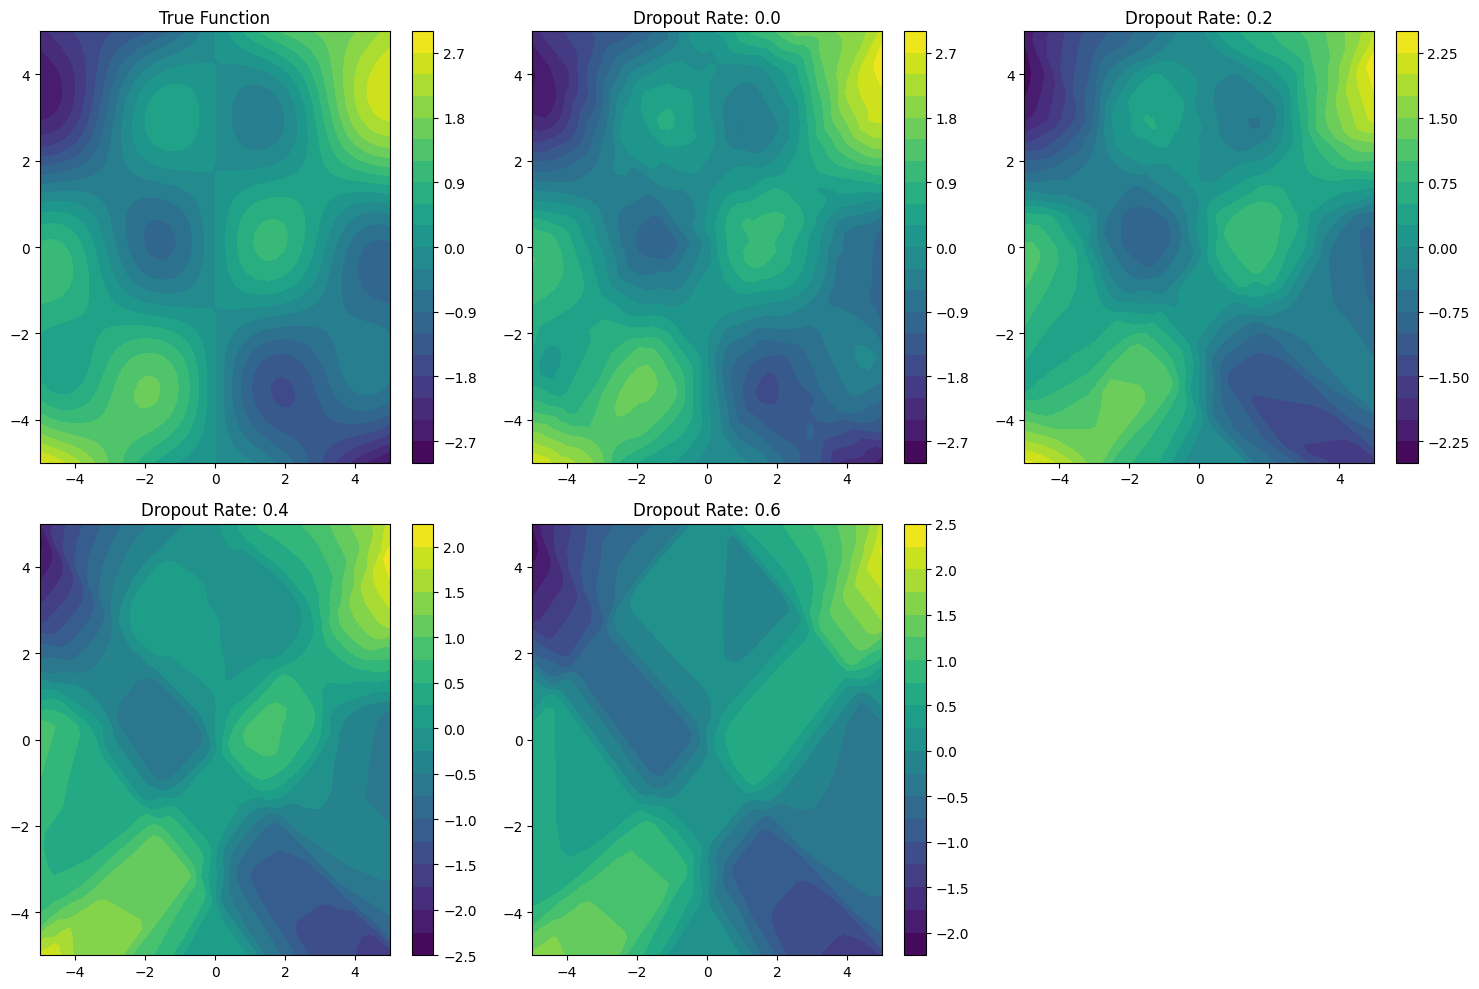

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Define a complex function
def complex_function(x, y):
    return np.sin(x) * np.cos(y) + 0.1 * x * y

# Generate dataset
N = 1000  # Number of samples
x = np.random.uniform(-5, 5, N)
y = np.random.uniform(-5, 5, N)
z = complex_function(x, y) + np.random.normal(0, 0.1, N)  # Adding some noise

X_train = torch.tensor(np.column_stack((x, y)), dtype=torch.float32)
y_train = torch.tensor(z, dtype=torch.float32).unsqueeze(1)

# Define a neural network model with dropout
class NeuralNetwork(nn.Module):
    def __init__(self, dropout_rate):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(2, 64)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(64, 64)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Train multiple models with different dropout rates
dropout_rates = [0.0, 0.2, 0.4, 0.6]
n_epochs = 10000
models = {}

for rate in dropout_rates:
    print(f"Training model with dropout rate: {rate}")
    model = NeuralNetwork(rate)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.MSELoss()

    for epoch in range(n_epochs):
        model.train()
        optimizer.zero_grad()
        output = model(X_train)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()

    models[rate] = model

# Generate high-resolution grid for visualization
grid_size = 50
grid_x, grid_y = np.meshgrid(np.linspace(-5, 5, grid_size), np.linspace(-5, 5, grid_size))
grid_points = torch.tensor(np.column_stack((grid_x.ravel(), grid_y.ravel())), dtype=torch.float32)
true_values = complex_function(grid_x, grid_y)

# Plot the true function
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.contourf(grid_x, grid_y, true_values, levels=20, cmap='viridis')
plt.colorbar()
plt.title('True Function')

# Visualizing model predictions
for i, rate in enumerate(dropout_rates):
    models[rate].eval()
    with torch.no_grad():
        predictions = models[rate](grid_points).numpy().reshape(grid_x.shape)

    plt.subplot(2, 3, i+2)
    plt.contourf(grid_x, grid_y, predictions, levels=20, cmap='viridis')
    plt.colorbar()
    plt.title(f'Dropout Rate: {rate}')

plt.tight_layout()
plt.show()

# Small amount of data
because the dataset is very indicative of the actual problem

Training model with dropout rate: 0.0
Training model with dropout rate: 0.2
Training model with dropout rate: 0.4
Training model with dropout rate: 0.6


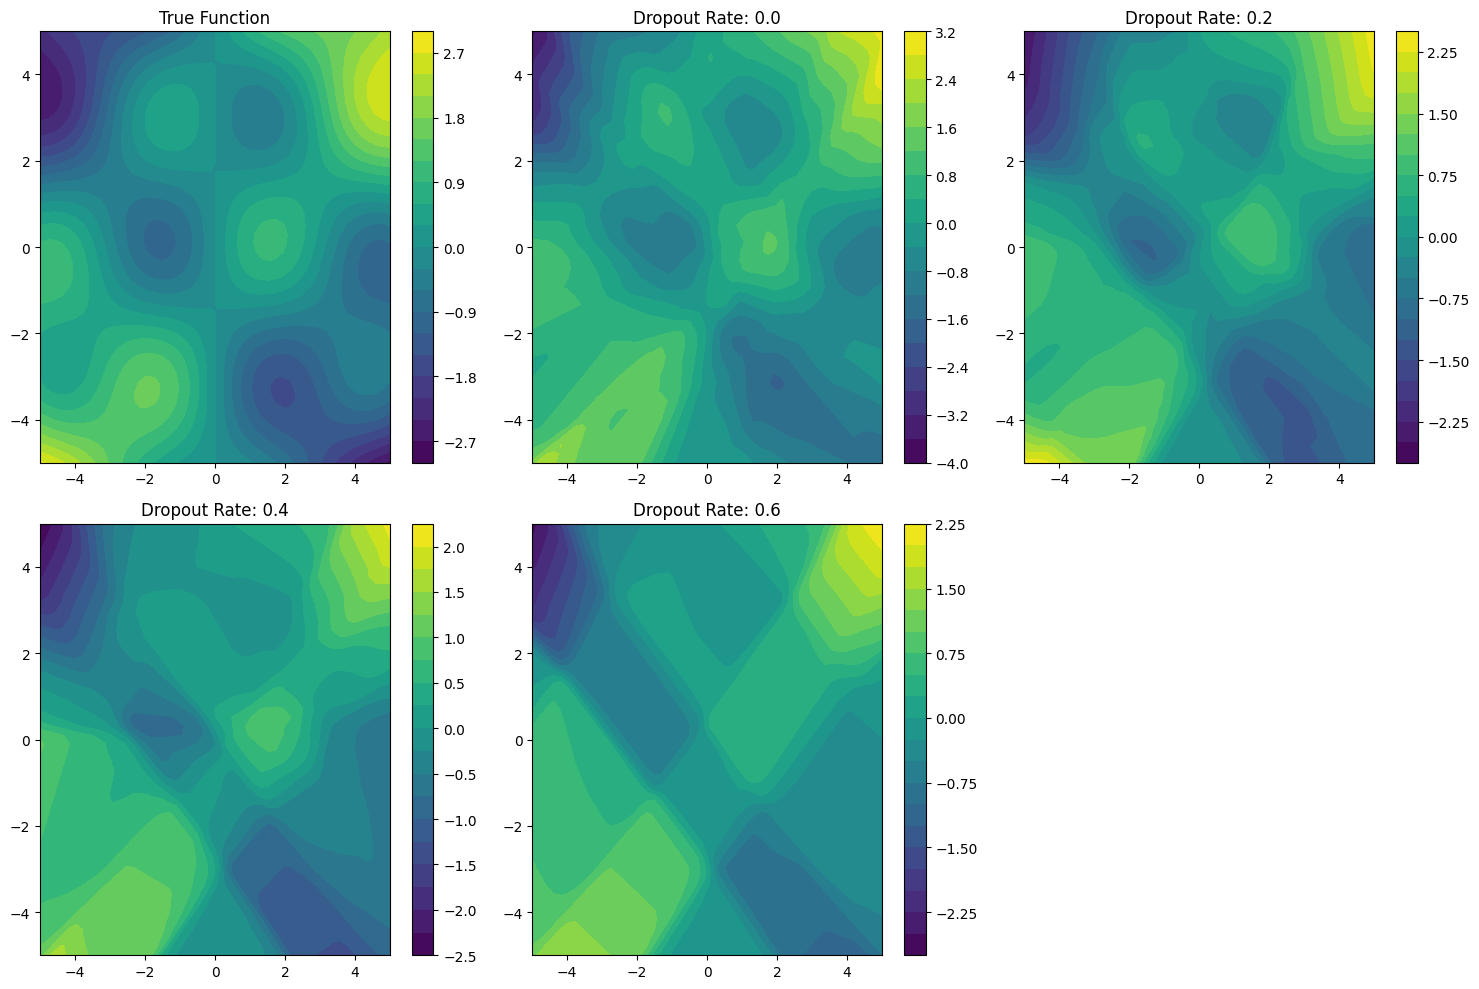

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Define a complex function
def complex_function(x, y):
    return np.sin(x) * np.cos(y) + 0.1 * x * y

# Generate dataset
N = 100  # Number of samples
x = np.random.uniform(-5, 5, N)
y = np.random.uniform(-5, 5, N)
z = complex_function(x, y) + np.random.normal(0, 0.1, N)  # Adding some noise

X_train = torch.tensor(np.column_stack((x, y)), dtype=torch.float32)
y_train = torch.tensor(z, dtype=torch.float32).unsqueeze(1)

# Define a neural network model with dropout
class NeuralNetwork(nn.Module):
    def __init__(self, dropout_rate):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(2, 64)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(64, 64)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Train multiple models with different dropout rates
dropout_rates = [0.0, 0.2, 0.4, 0.6]
n_epochs = 10000
models = {}

for rate in dropout_rates:
    print(f"Training model with dropout rate: {rate}")
    model = NeuralNetwork(rate)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.MSELoss()

    for epoch in range(n_epochs):
        model.train()
        optimizer.zero_grad()
        output = model(X_train)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()

    models[rate] = model

# Generate high-resolution grid for visualization
grid_size = 50
grid_x, grid_y = np.meshgrid(np.linspace(-5, 5, grid_size), np.linspace(-5, 5, grid_size))
grid_points = torch.tensor(np.column_stack((grid_x.ravel(), grid_y.ravel())), dtype=torch.float32)
true_values = complex_function(grid_x, grid_y)

# Plot the true function
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.contourf(grid_x, grid_y, true_values, levels=20, cmap='viridis')
plt.colorbar()
plt.title('True Function')

# Visualizing model predictions
for i, rate in enumerate(dropout_rates):
    models[rate].eval()
    with torch.no_grad():
        predictions = models[rate](grid_points).numpy().reshape(grid_x.shape)

    plt.subplot(2, 3, i+2)
    plt.contourf(grid_x, grid_y, predictions, levels=20, cmap='viridis')
    plt.colorbar()
    plt.title(f'Dropout Rate: {rate}')

plt.tight_layout()
plt.show()

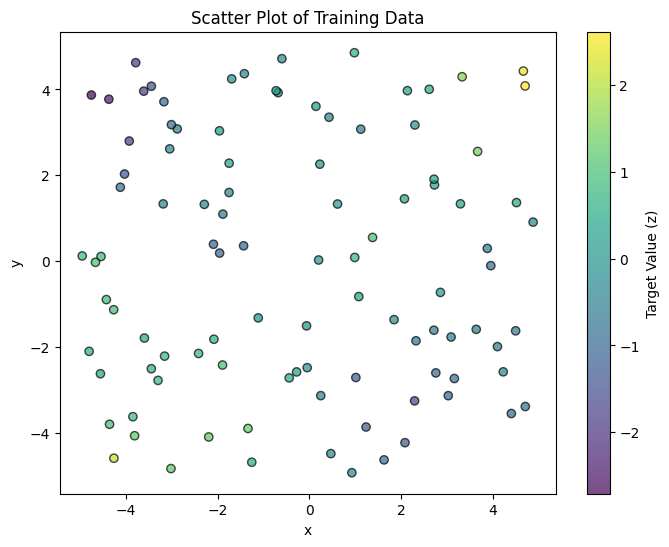

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of the training data
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=z, cmap='viridis', edgecolors='k', alpha=0.7)
plt.colorbar(label="Target Value (z)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter Plot of Training Data")
plt.show()

# Small ammount of noisy data

Training model with dropout rate: 0.0
Training model with dropout rate: 0.2
Training model with dropout rate: 0.4
Training model with dropout rate: 0.6


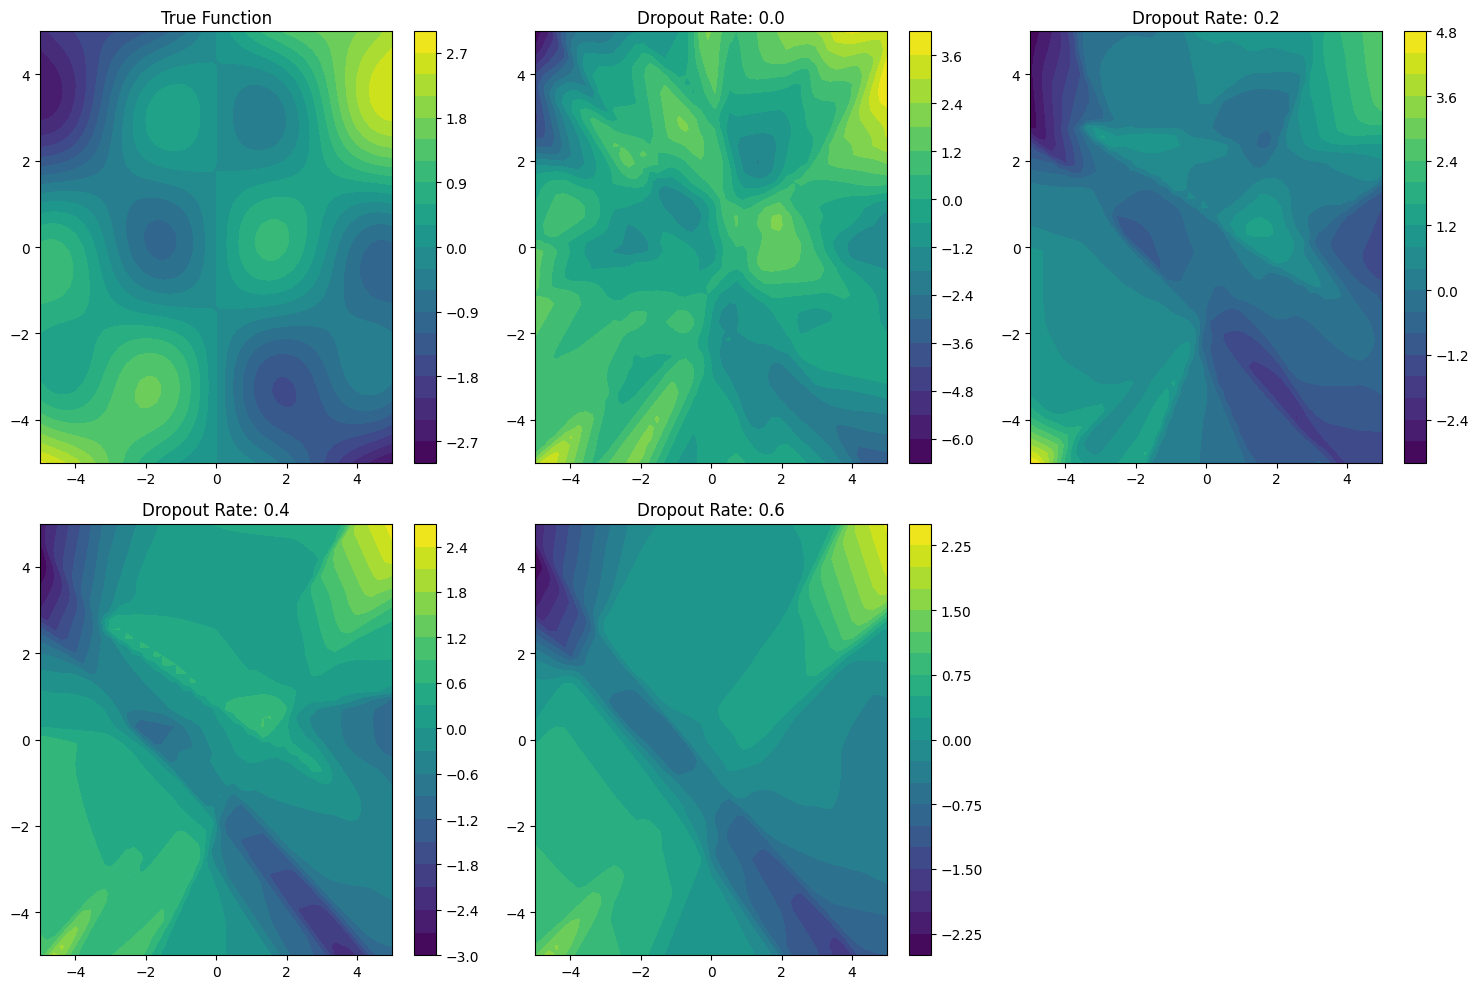

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Define a complex function
def complex_function(x, y):
    return np.sin(x) * np.cos(y) + 0.1 * x * y

# Generate dataset
N = 100  # Number of samples
x = np.random.uniform(-5, 5, N)
y = np.random.uniform(-5, 5, N)
z = complex_function(x, y) + np.random.normal(0, 0.5, N)  # Adding some noise

X_train = torch.tensor(np.column_stack((x, y)), dtype=torch.float32)
y_train = torch.tensor(z, dtype=torch.float32).unsqueeze(1)

# Define a neural network model with dropout
class NeuralNetwork(nn.Module):
    def __init__(self, dropout_rate):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(2, 64)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(64, 64)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Train multiple models with different dropout rates
dropout_rates = [0.0, 0.2, 0.4, 0.6]
n_epochs = 10000
models = {}

for rate in dropout_rates:
    print(f"Training model with dropout rate: {rate}")
    model = NeuralNetwork(rate)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.MSELoss()

    for epoch in range(n_epochs):
        model.train()
        optimizer.zero_grad()
        output = model(X_train)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()

    models[rate] = model

# Generate high-resolution grid for visualization
grid_size = 50
grid_x, grid_y = np.meshgrid(np.linspace(-5, 5, grid_size), np.linspace(-5, 5, grid_size))
grid_points = torch.tensor(np.column_stack((grid_x.ravel(), grid_y.ravel())), dtype=torch.float32)
true_values = complex_function(grid_x, grid_y)

# Plot the true function
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.contourf(grid_x, grid_y, true_values, levels=20, cmap='viridis')
plt.colorbar()
plt.title('True Function')

# Visualizing model predictions
for i, rate in enumerate(dropout_rates):
    models[rate].eval()
    with torch.no_grad():
        predictions = models[rate](grid_points).numpy().reshape(grid_x.shape)

    plt.subplot(2, 3, i+2)
    plt.contourf(grid_x, grid_y, predictions, levels=20, cmap='viridis')
    plt.colorbar()
    plt.title(f'Dropout Rate: {rate}')

plt.tight_layout()
plt.show()

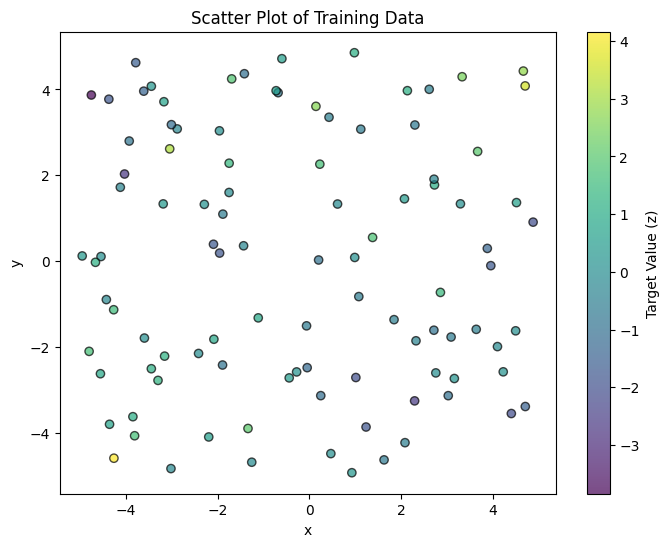

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of the training data
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=z, cmap='viridis', edgecolors='k', alpha=0.7)
plt.colorbar(label="Target Value (z)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter Plot of Training Data")
plt.show()
